In [3]:
import pandas as pd
import gzip
#import pandas_profiling as pdp
from IPython.display import display
import dask.dataframe as dd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.patches as mpatches

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'HGMaruGothicMPRO'
print(mpl.rcParams['font.family'])

['HGMaruGothicMPRO']


# データ読み込みからデータ成型まで

In [102]:
col_names = [ '日付開始','価格','最高価格','最低価格','終値','ボリューム','時価総額']
df_bitcoin = pd.read_csv('bitcoin2.csv',encoding="utf-8", names=col_names,skipinitialspace=True)
df_bitcoin.isnull().sum()
df_bitcoin=df_bitcoin.drop(0)



### 日付の表示形式を変更

In [103]:
df_bitcoin['日付開始'] = df_bitcoin['日付開始'].str.replace('年', '-')
df_bitcoin['日付開始'] = df_bitcoin['日付開始'].str.replace('月', '-')
df_bitcoin['日付開始'] = df_bitcoin['日付開始'].str.replace('日', '')
df_bitcoin['価格'] = df_bitcoin['価格'].str.replace(',', '')
df_bitcoin['最高価格'] = df_bitcoin['最高価格'].str.replace(',', '')
df_bitcoin['最低価格'] = df_bitcoin['最低価格'].str.replace(',', '')
df_bitcoin['終値'] = df_bitcoin['終値'].str.replace(',', '')
df_bitcoin['ボリューム'] = df_bitcoin['ボリューム'].str.replace(',', '')
df_bitcoin['時価総額'] = df_bitcoin['時価総額'].str.replace(',', '')

In [104]:
df_bitcoin['日付開始']=pd.to_datetime(df_bitcoin['日付開始'],format='%Y-%m-%d')

In [105]:
df_bitcoin.dtypes
df_bitcoin['価格']=df_bitcoin['価格'].astype('double')
df_bitcoin['最高価格']=df_bitcoin['最高価格'].astype('double')
df_bitcoin['最低価格']=df_bitcoin['最低価格'].astype('double')
df_bitcoin['終値']=df_bitcoin['終値'].astype('double')
#df_bitcoin['ボリューム']=df_bitcoin['ボリューム'].astype('double')
df_bitcoin['時価総額']=df_bitcoin['時価総額'].astype('double')

In [106]:
df_bitcoin=df_bitcoin.sort_values(by='日付開始',ascending=False)

# 基礎集計

## 時系列ごとに見てみる

In [107]:
bitgroup=df_bitcoin.groupby(pd.Grouper(key='日付開始',freq='1d')).sum()

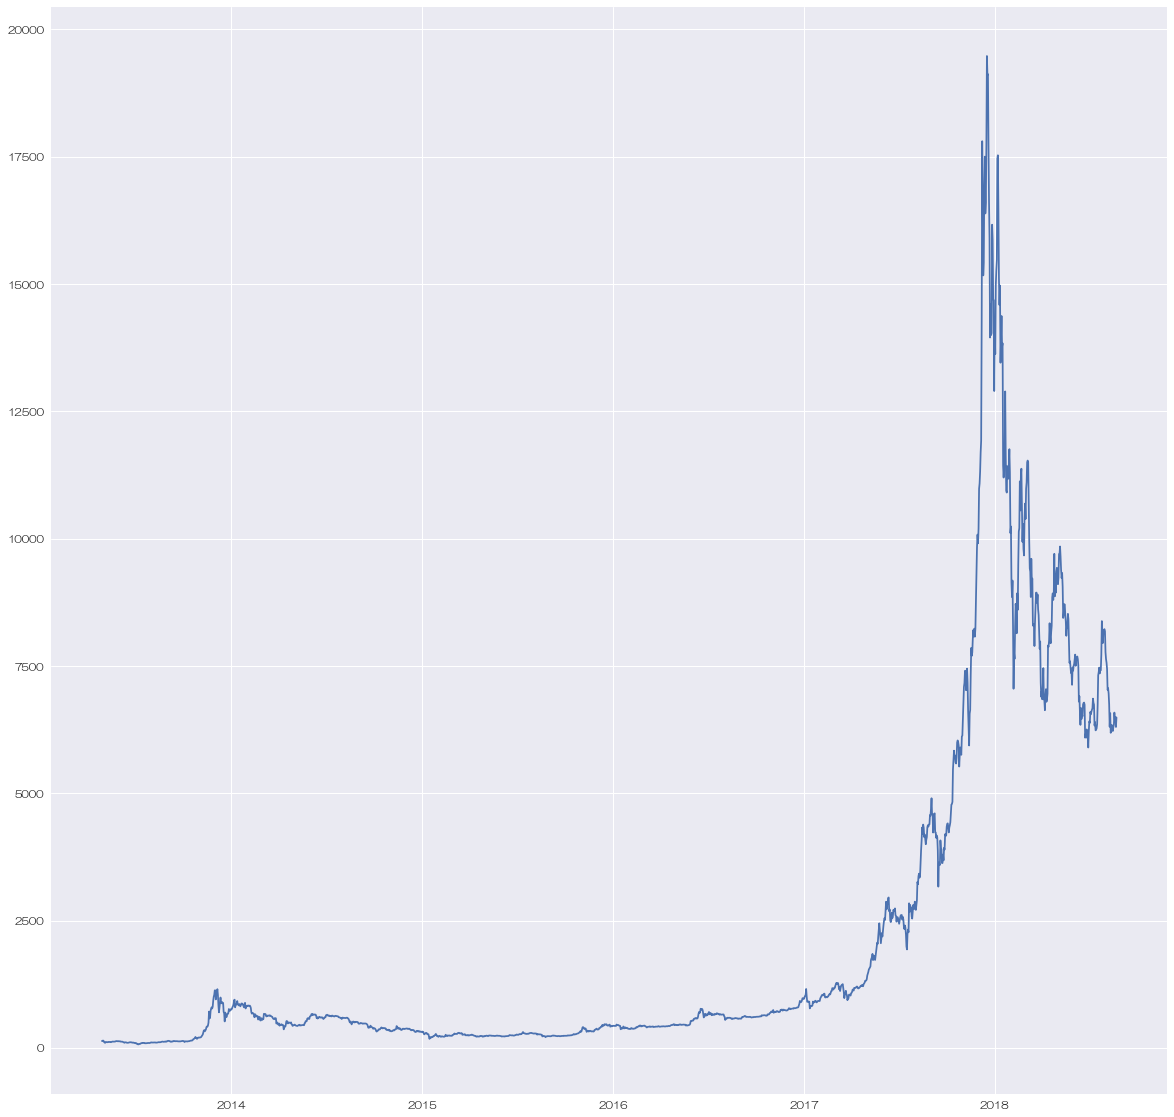

In [108]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['価格'])

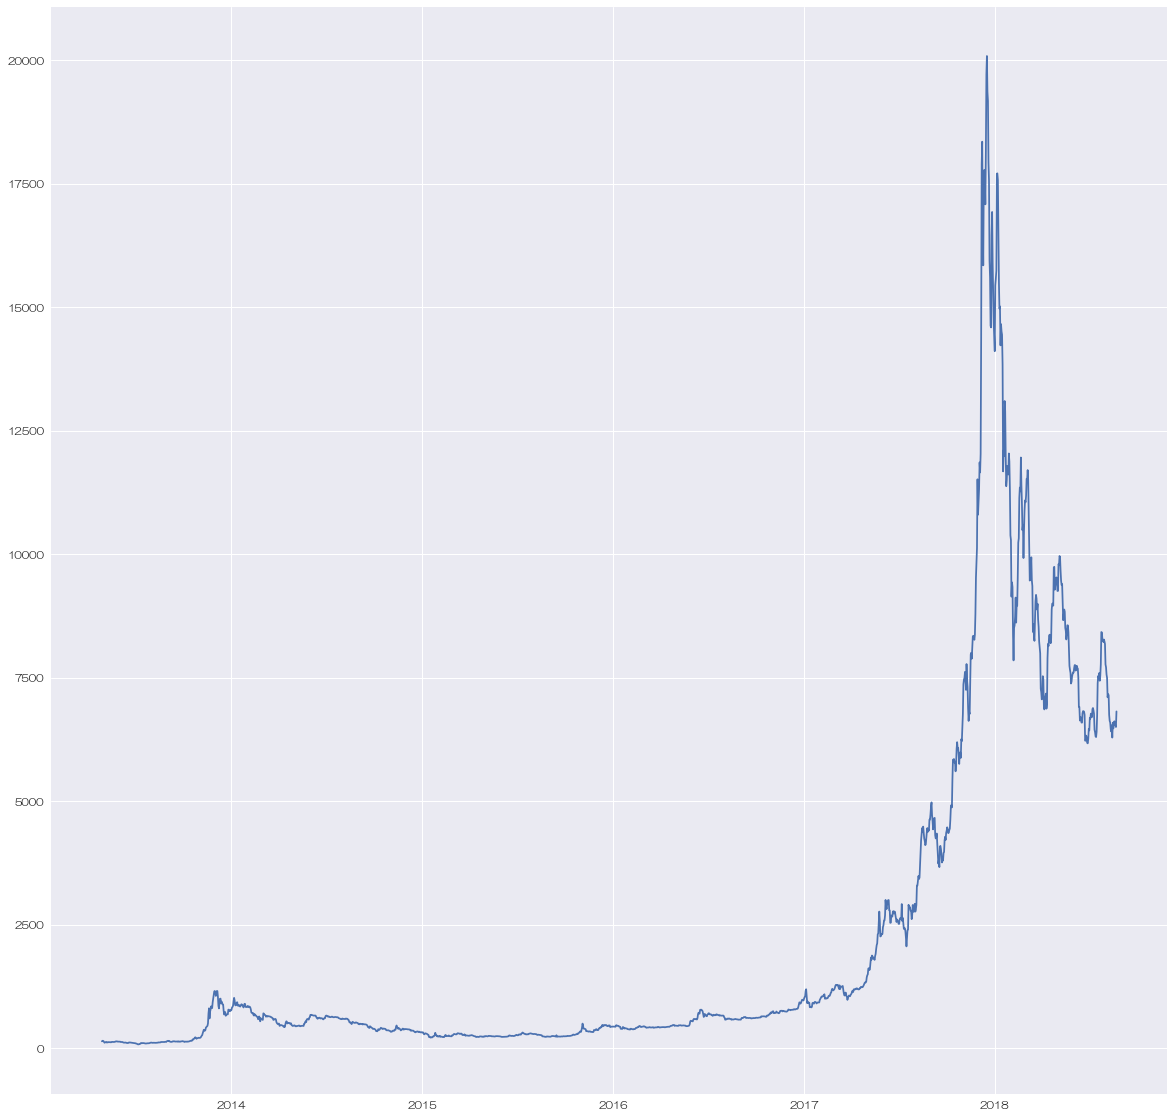

In [109]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['最高価格'])

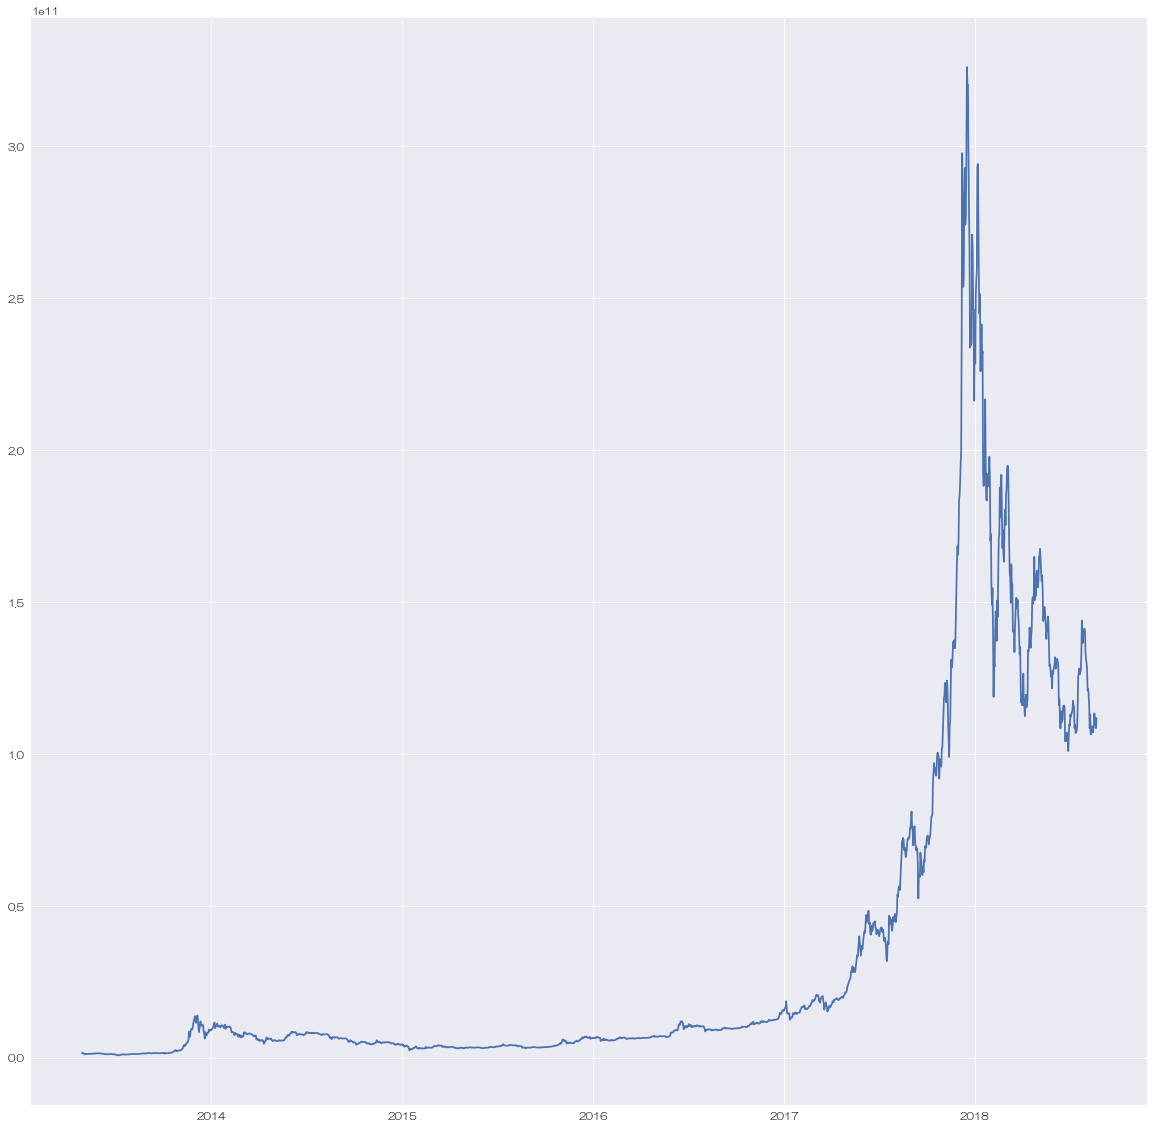

In [110]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['時価総額'])

In [111]:
bitcoin_1m_mean=df_bitcoin.groupby(pd.Grouper(key='日付開始',freq='1m')).mean()
bitcoin_1m_mean=bitcoin_1m_mean.reset_index()

In [112]:
bitcoin_1y_mean=df_bitcoin.groupby(pd.Grouper(key='日付開始',freq='1y')).mean()
bitcoin_1y_mean=bitcoin_1y_mean.reset_index()
bitcoin_1y_mean

,日付開始,価格,最高価格,最低価格,終値,時価総額
0,2013-12-31,255.147944,269.322379,239.651935,257.474395,3.031221e+09
1,2014-12-31,528.404740,540.312000,514.366740,527.236548,6.795851e+09
2,2015-12-31,272.149041,278.151863,266.807918,272.453397,3.916406e+09
3,2016-12-31,567.141503,574.302295,560.453415,568.492213,8.906763e+09
4,2017-12-31,3970.644849,4144.687534,3811.707808,4006.033616,6.586193e+10
5,2018-12-31,8689.293632,8933.006923,8358.743419,8655.518632,1.474954e+11


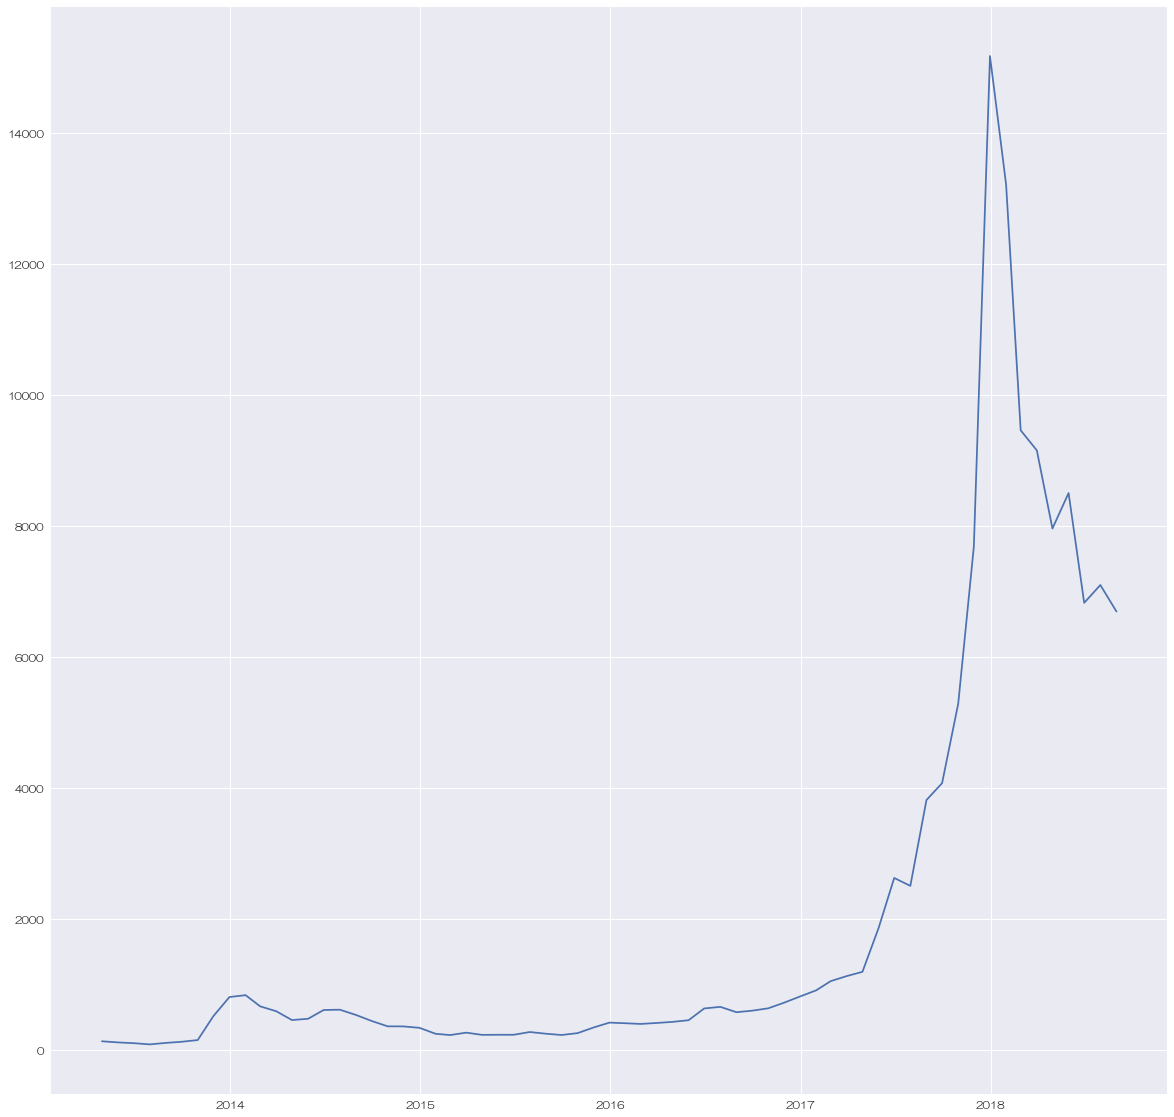

In [113]:
plt.figure(figsize=(20, 20))
plt.plot(bitcoin_1m_mean['日付開始'],bitcoin_1m_mean['価格'])

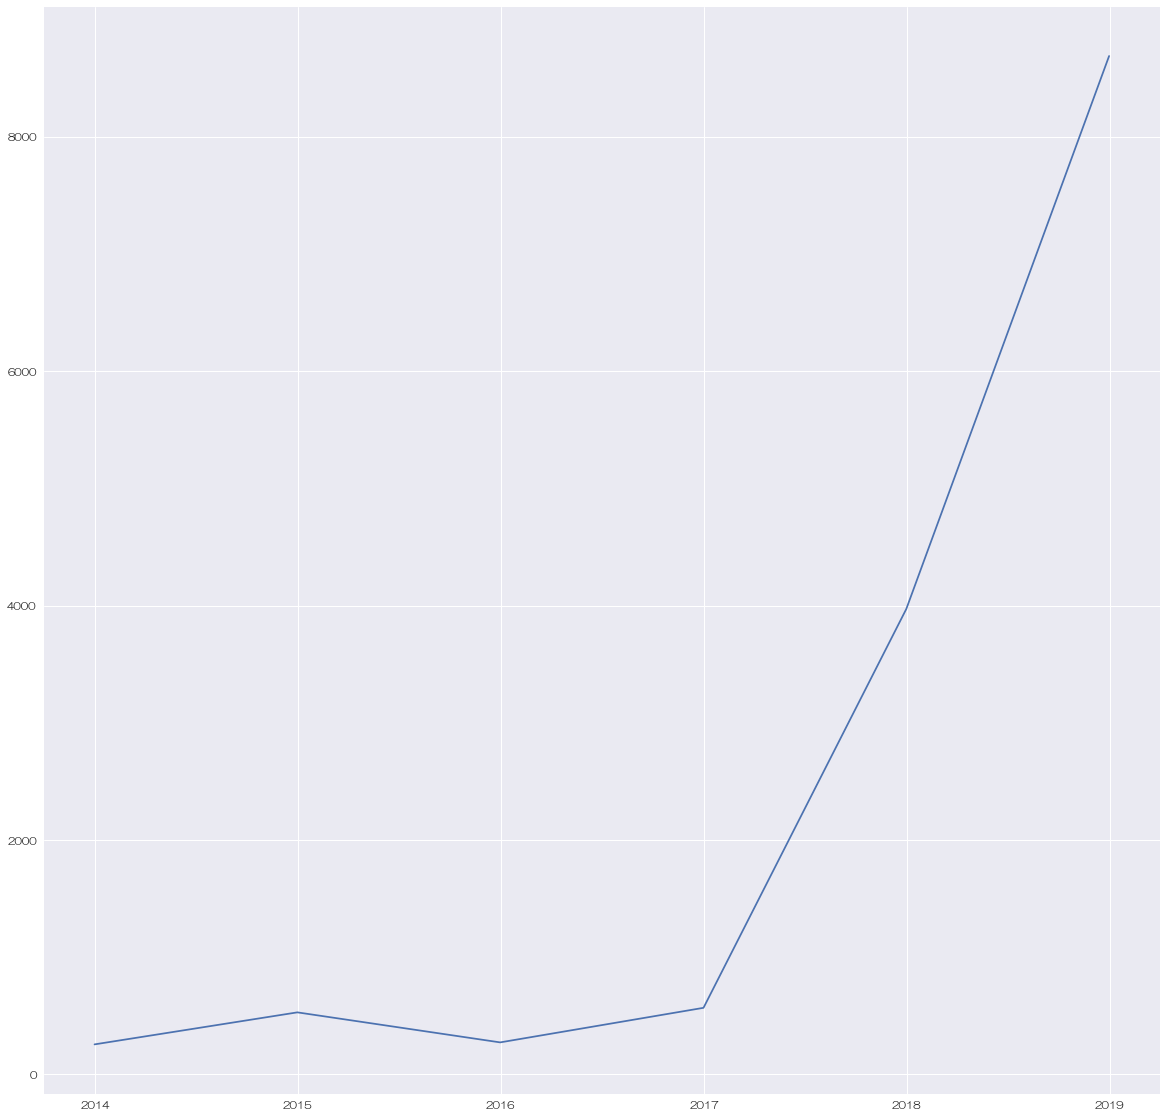

In [114]:
plt.figure(figsize=(20, 20))
plt.plot(bitcoin_1y_mean['日付開始'],bitcoin_1y_mean['価格'])

# 新カラム作成

In [159]:
df_bitcoin['kouteisa']=df_bitcoin['最高価格']-df_bitcoin['最低価格']

In [160]:
df_bitcoin['difference_1day'] = df_bitcoin['価格'].diff(periods=1)
df_bitcoin['difference_2day'] = df_bitcoin['価格'].diff(periods=2)
df_bitcoin['difference_3day'] = df_bitcoin['価格'].diff(periods=3)
df_bitcoin['difference_7day'] = df_bitcoin['価格'].diff(periods=7)
df_bitcoin['difference_30day'] = df_bitcoin['価格'].diff(periods=30)
df_bitcoin['difference_60day'] = df_bitcoin['価格'].diff(periods=60)


In [161]:
df_bitcoin['rolling_mean_3d']=pd.rolling_mean(df_bitcoin['価格'],window=3)
df_bitcoin['rolling_mean_7d']=pd.rolling_mean(df_bitcoin['価格'],window=7)
df_bitcoin['rolling_mean_30d']=pd.rolling_mean(df_bitcoin['価格'],window=30)
df_bitcoin['rolling_mean_60d']=pd.rolling_mean(df_bitcoin['価格'],window=60)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a 

# 新カラムを基礎集計

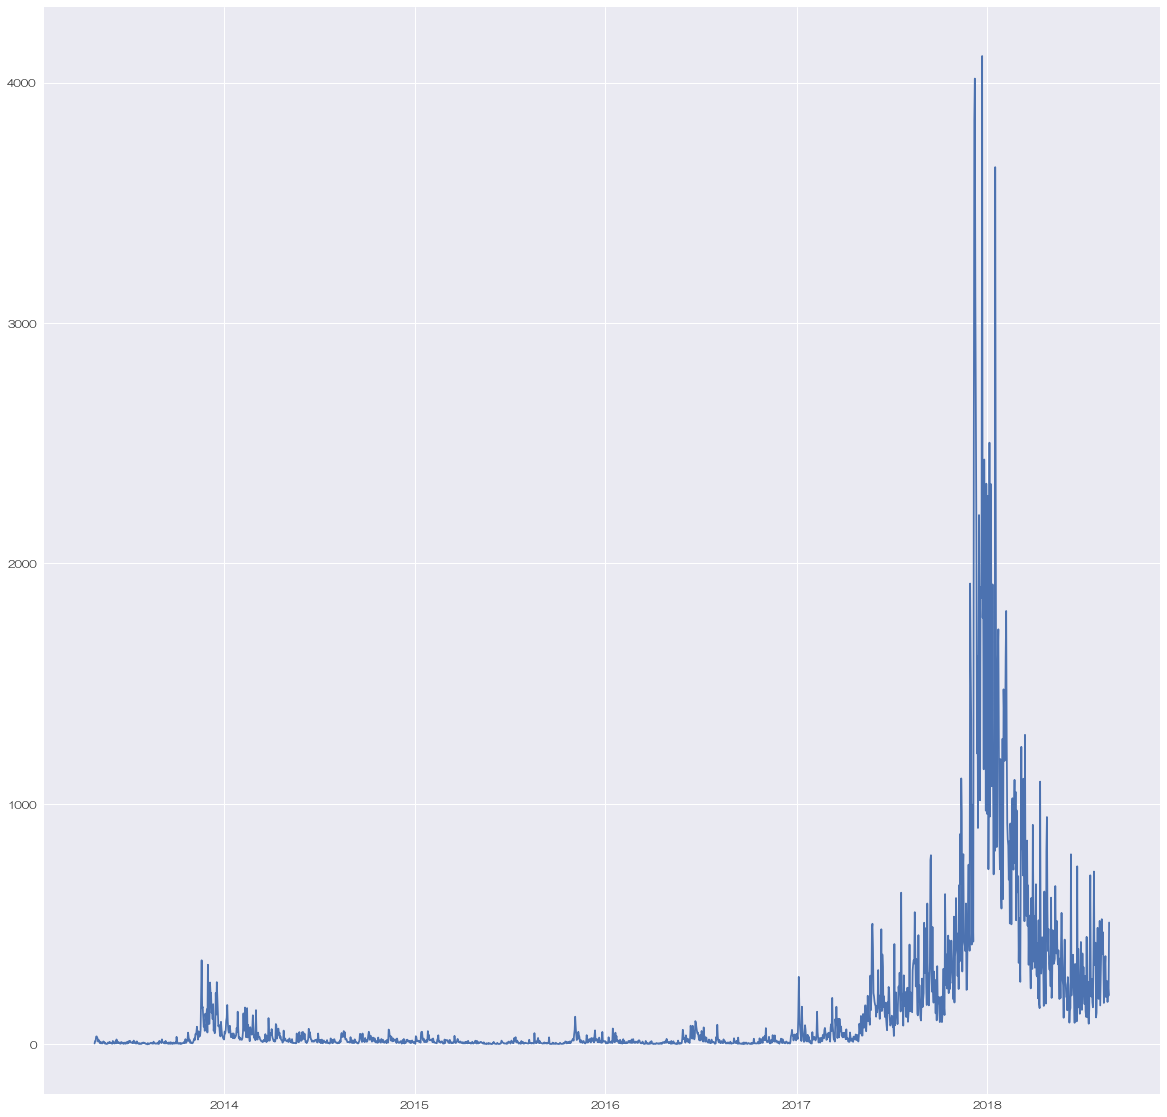

In [162]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['kouteisa'])

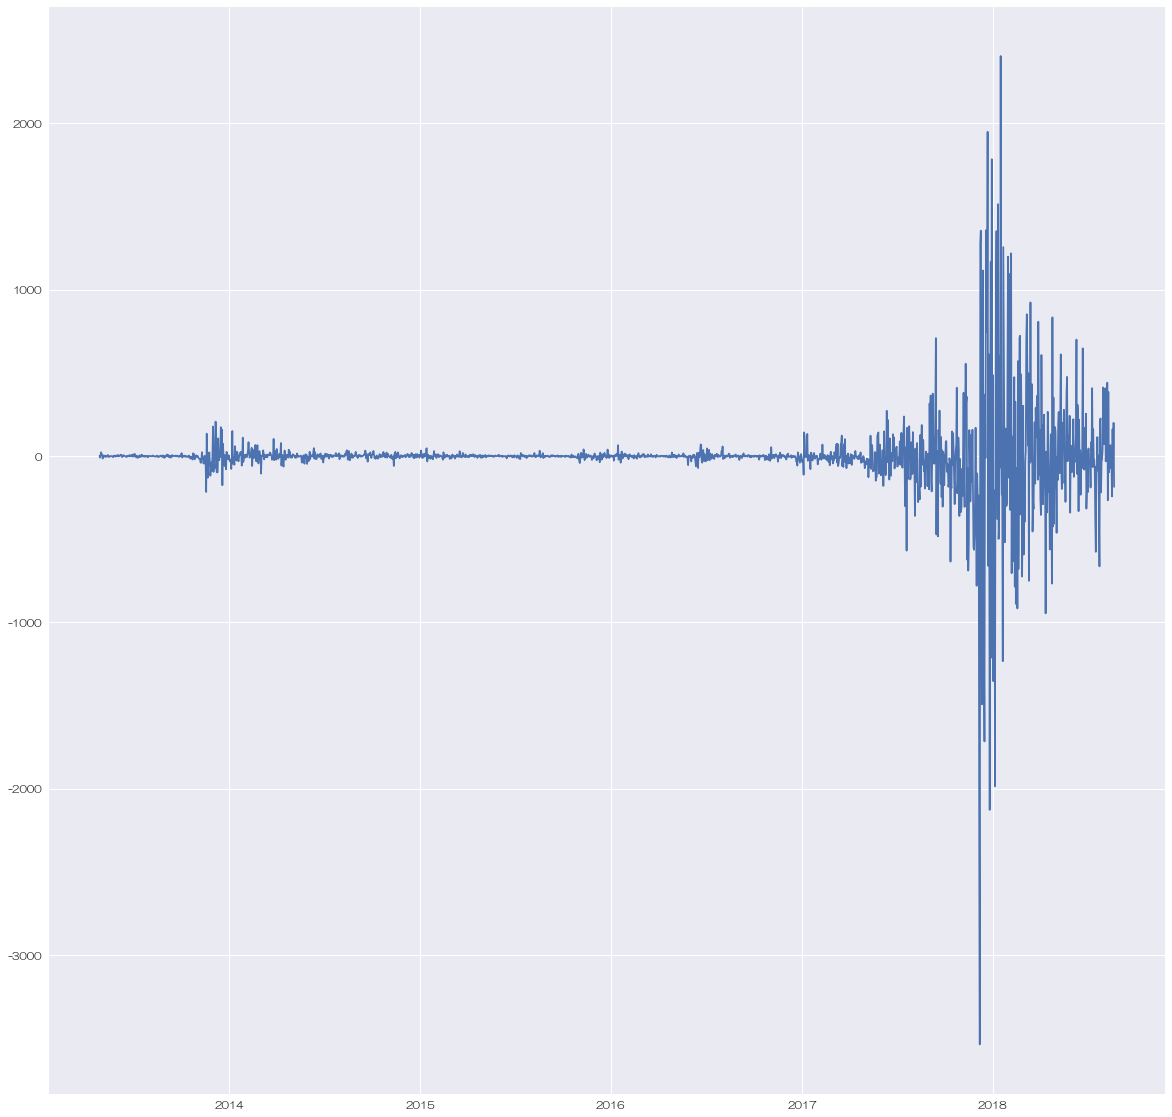

In [163]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['difference_1day'])

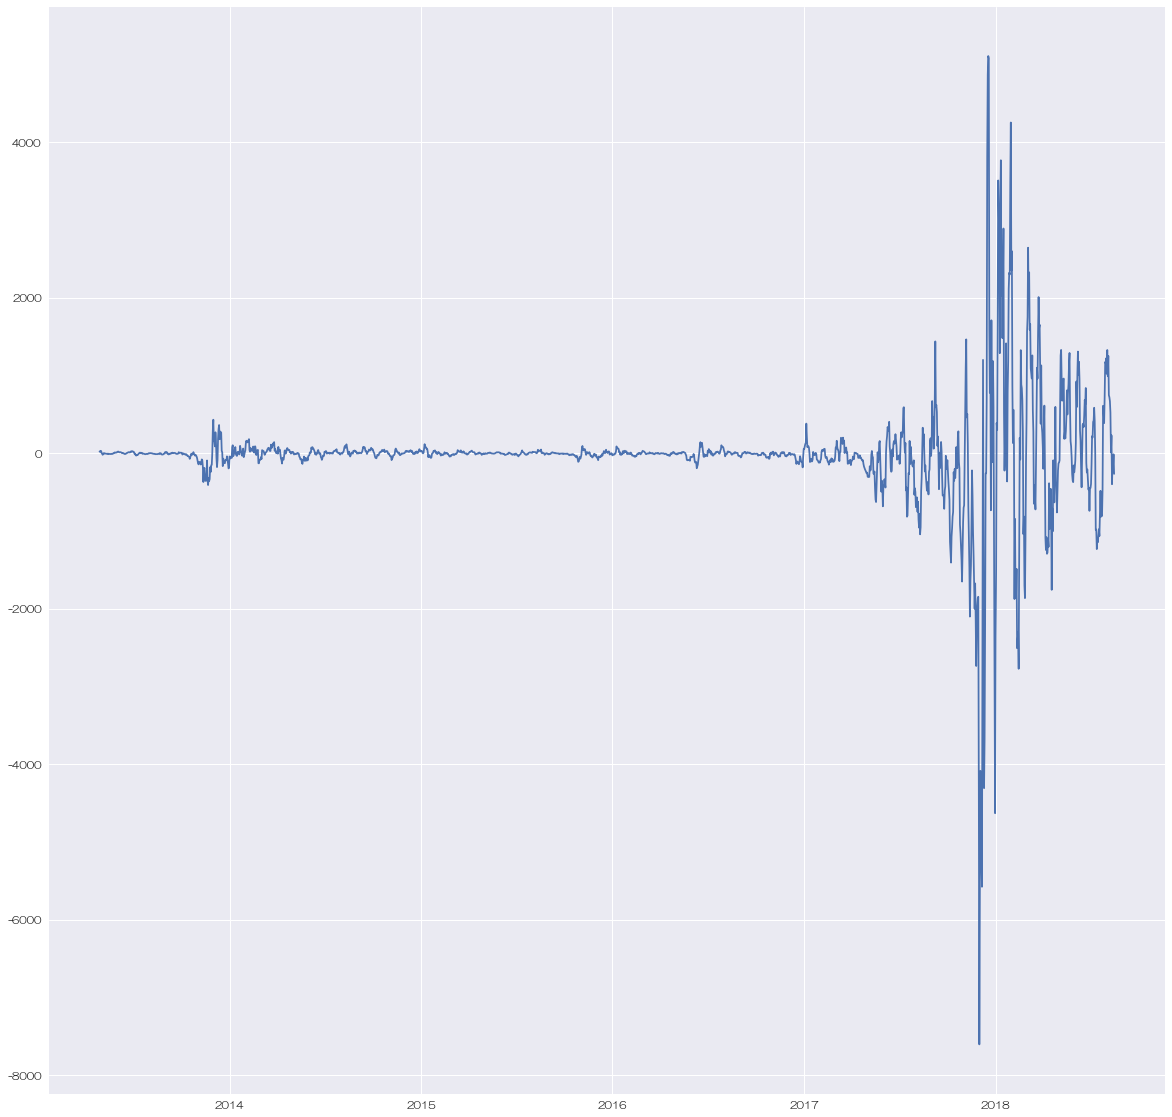

In [164]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['difference_7day'])

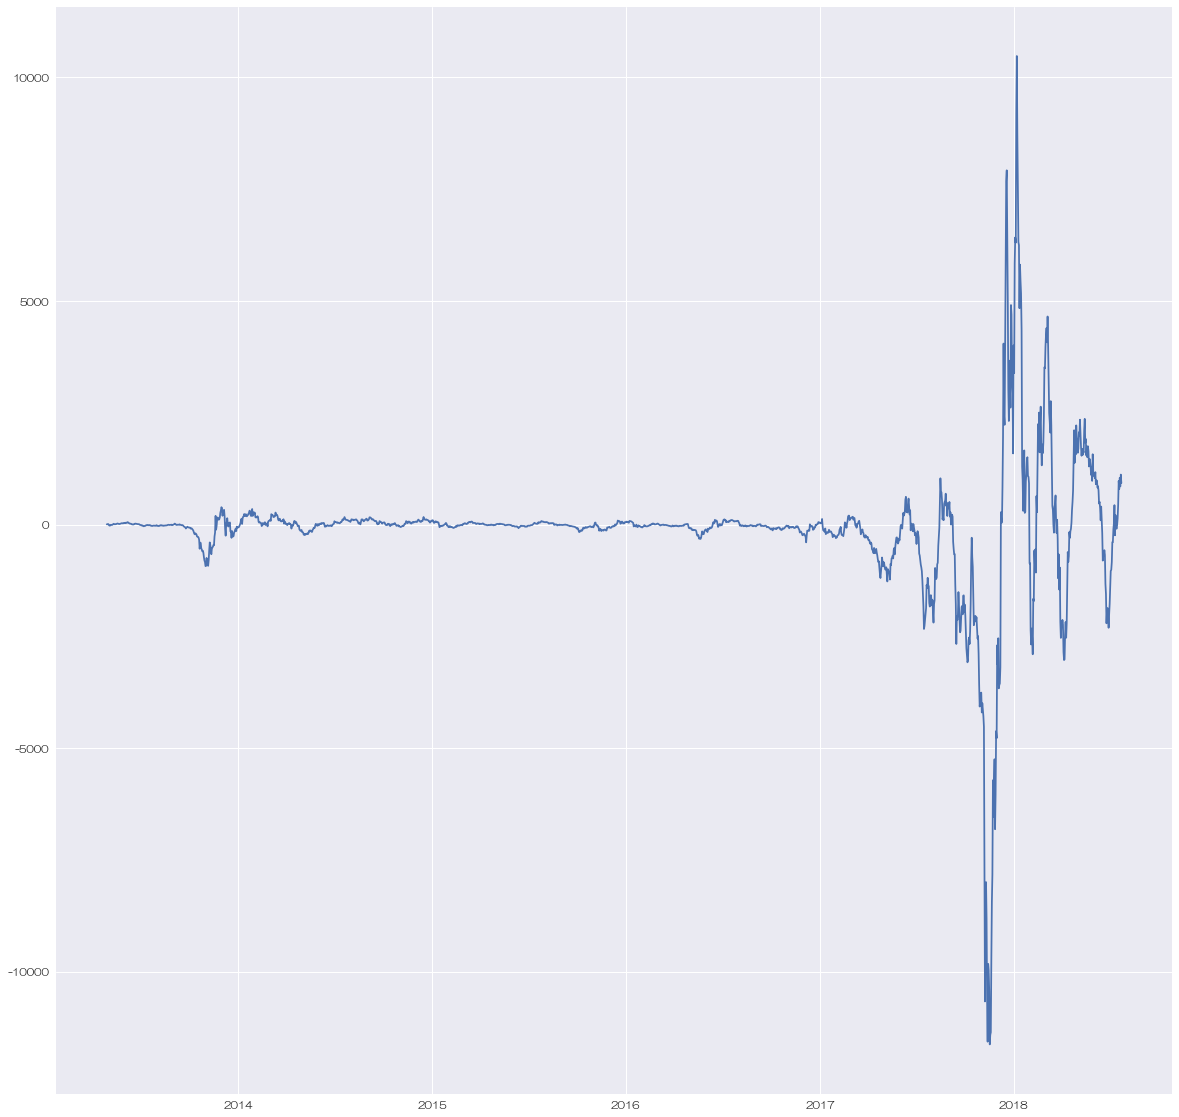

In [165]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['difference_30day'])

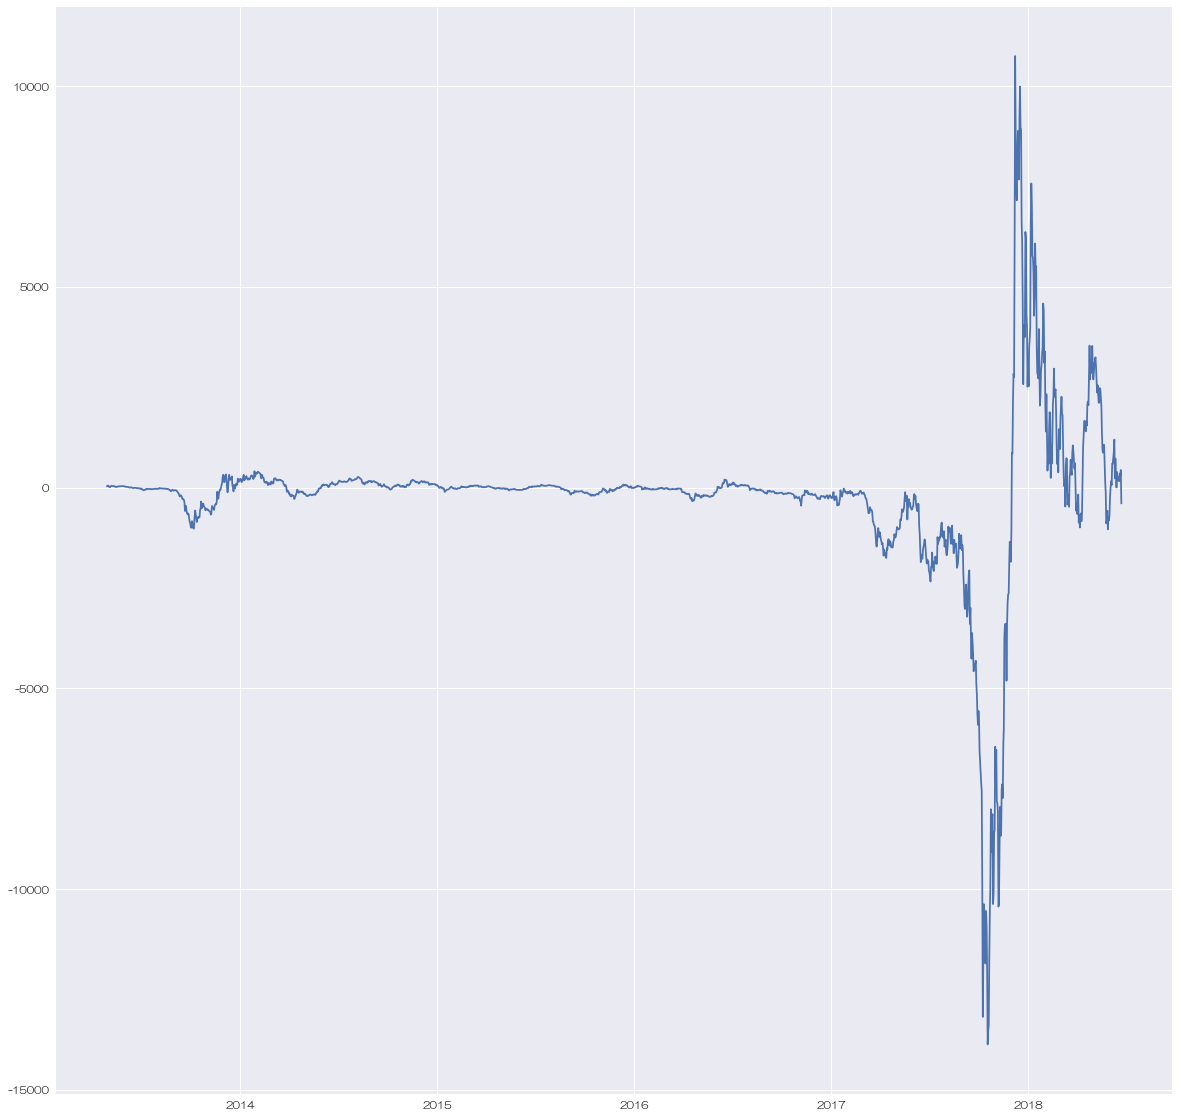

In [169]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['difference_60day'])

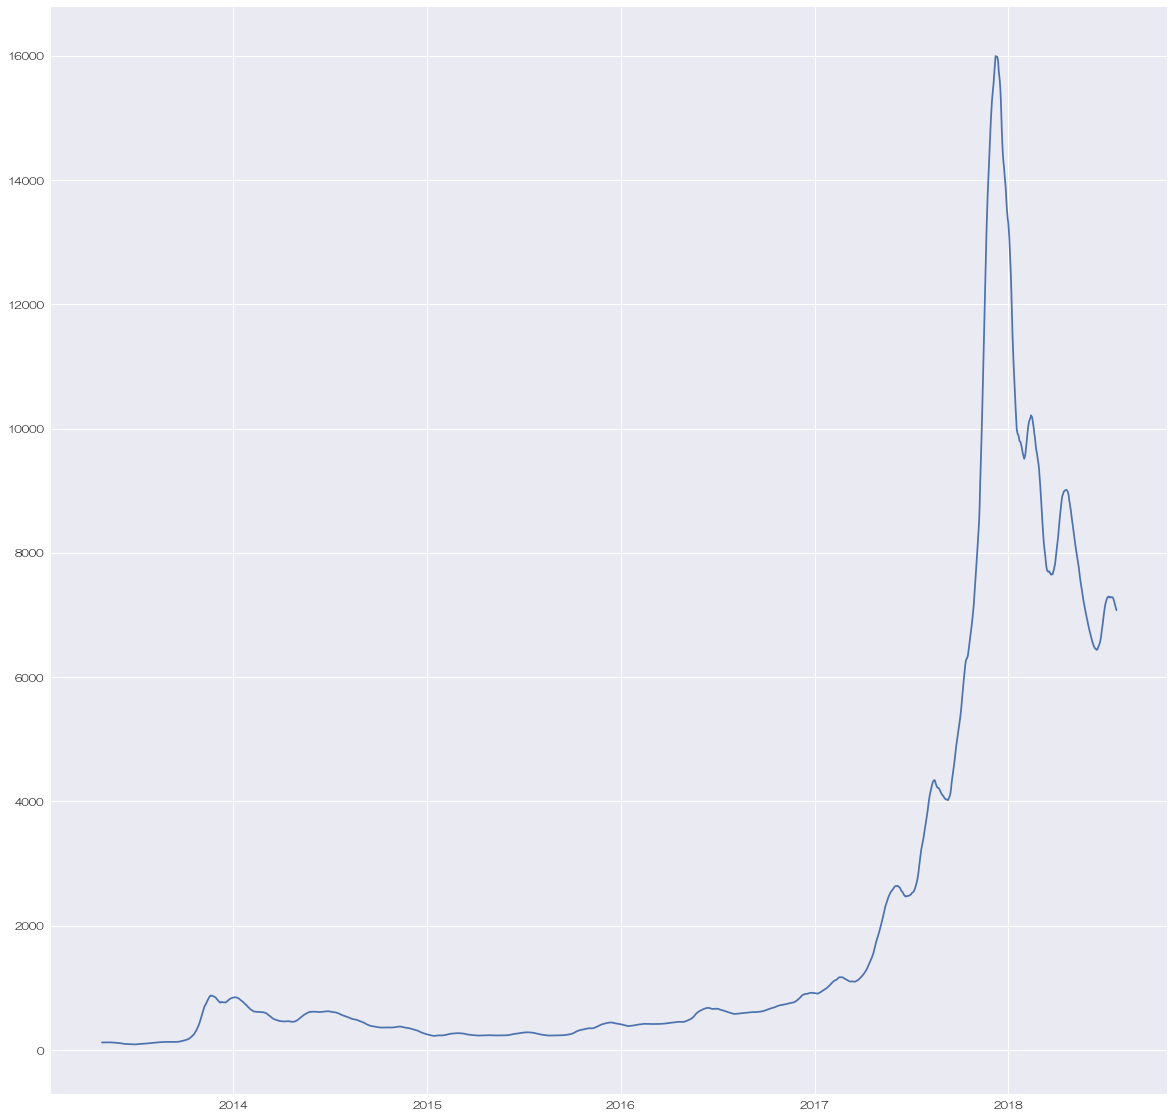

In [170]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['rolling_mean_30d'])

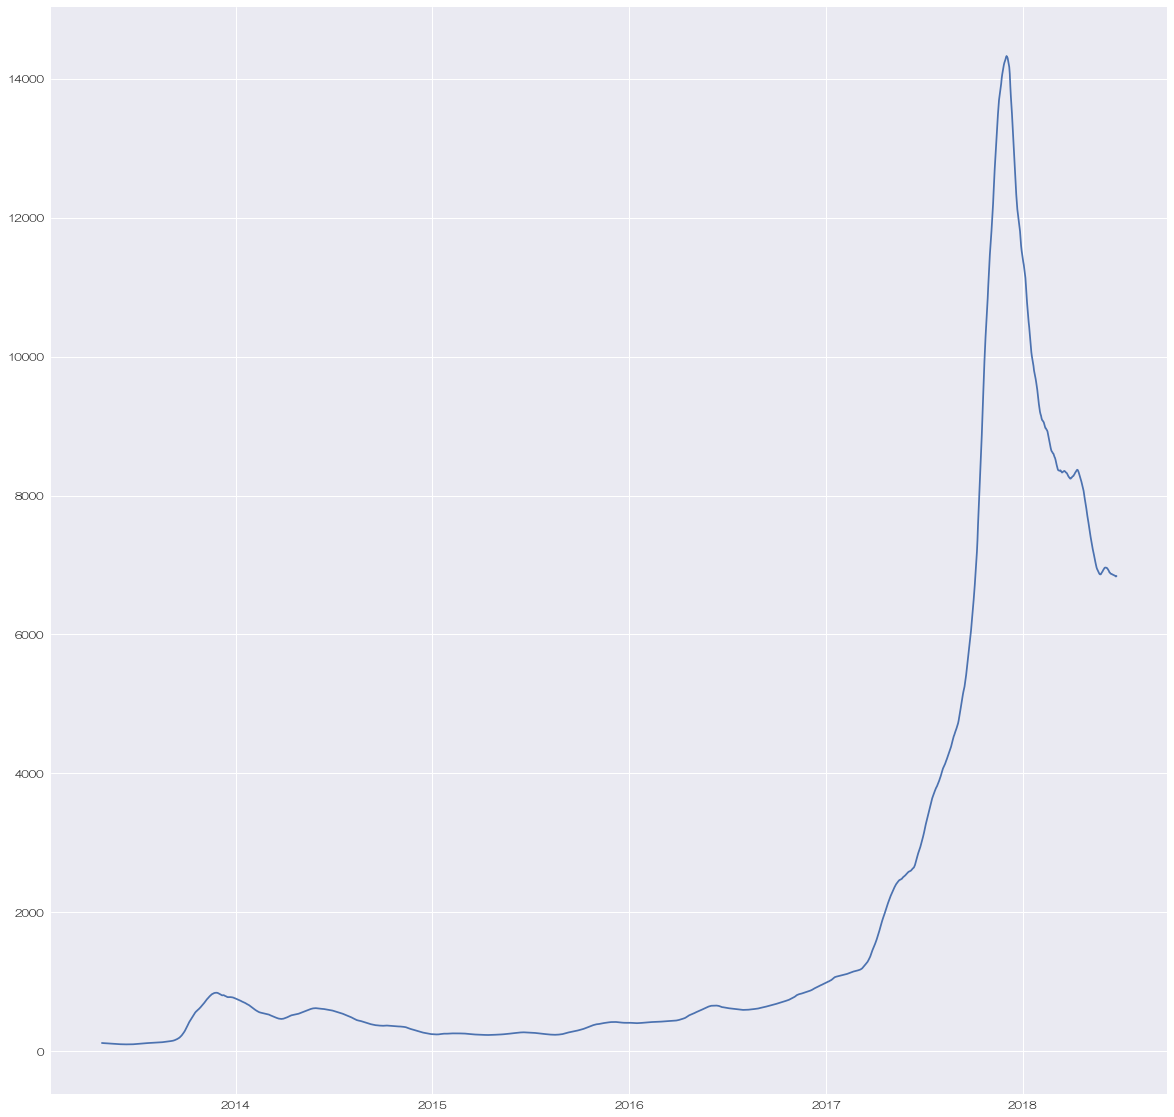

In [171]:
plt.figure(figsize=(20, 20))
plt.plot(df_bitcoin['日付開始'],df_bitcoin['rolling_mean_60d'])

In [167]:
df_bitcoin.corr()

,価格,最高価格,最低価格,終値,時価総額,kouteisa,difference_1day,difference_2day,difference_3day,difference_7day,difference_30day,difference_60day,rolling_mean_3d,rolling_mean_7d,rolling_mean_30d,rolling_mean_60d
価格,1.000000,0.998909,0.998055,0.997537,0.999836,0.818965,0.029986,0.044869,0.054947,0.083209,0.179421,0.244089,0.998557,0.995154,0.971933,0.940502
最高価格,0.998909,1.000000,0.998039,0.999149,0.998594,0.829722,-0.008491,0.016608,0.033444,0.066342,0.171646,0.243774,0.999329,0.996563,0.973928,0.941773
最低価格,0.998055,0.998039,1.000000,0.998720,0.998107,0.793159,-0.014589,0.013197,0.029465,0.070145,0.169131,0.230266,0.998734,0.995723,0.973660,0.943614
終値,0.997537,0.999149,0.998720,1.000000,0.997355,0.815371,-0.040152,-0.006668,0.014220,0.056784,0.165840,0.235914,0.999491,0.997042,0.974780,0.943334
時価総額,0.999836,0.998594,0.998107,0.997355,1.000000,0.815440,0.030242,0.045170,0.055321,0.083815,0.179448,0.243998,0.998377,0.994942,0.971741,0.940280
kouteisa,0.818965,0.829722,0.793159,0.815371,0.815440,1.000000,0.047475,0.043896,0.062622,0.020152,0.162412,0.317959,0.817139,0.817860,0.798837,0.761121
difference_1day,0.029986,-0.008491,-0.014589,-0.040152,0.030242,0.047475,1.000000,0.733510,0.580240,0.374117,0.189603,0.112369,-0.017936,-0.031712,-0.052361,-0.044273
difference_2day,0.044869,0.016608,0.013197,-0.006668,0.045170,0.043896,0.733510,1.000000,0.831730,0.547596,0.261638,0.156611,-0.006454,-0.035651,-0.068940,-0.059708
difference_3day,0.054947,0.033444,0.029465,0.014220,0.055321,0.062622,0.580240,0.831730,1.000000,0.650183,0.320359,0.185174,0.012955,-0.034673,-0.081372,-0.071937
difference_7day,0.083209,0.066342,0.070145,0.056784,0.083815,0.020152,0.374117,0.547596,0.650183,1.000000,0.506311,0.286321,0.055746,0.001308,-0.111176,-0.105588


Text(0.5,1,'高値と安値の差と3か月後の差分の相関関係')

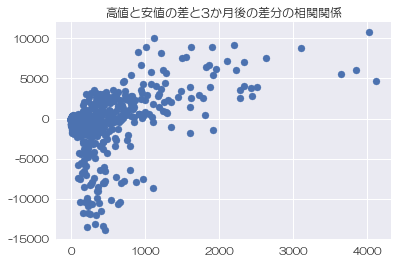

In [154]:
plt.scatter(df_bitcoin['kouteisa'],df_bitcoin['difference_60day'])
plt.title('高値と安値の差と3か月後の差分の相関関係')

In [153]:
df_bitcoin#注意！単位はドル($)

,日付開始,価格,最高価格,最低価格,終値,ボリューム,時価総額,kouteisa,difference_1day,difference_2day,difference_3day,difference_7day,difference_30day,difference_60day,rolling_mean_3d,rolling_mean_7d,rolling_mean_30d,rolling_mean_60d
1,2018-08-22,6486.25,6816.79,6310.11,6376.71,4668110000,1.117148e+11,506.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-21,6301.07,6500.87,6298.24,6488.76,3377180000,1.085136e+11,202.63,-185.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-20,6500.51,6536.92,6297.93,6308.53,3665100000,1.119361e+11,238.99,199.44,14.26,NaN,NaN,NaN,NaN,6429.276667,NaN,NaN,NaN
4,2018-08-19,6422.57,6537.98,6361.55,6506.07,3311170000,1.105826e+11,176.43,-77.94,121.50,-63.68,NaN,NaN,NaN,6408.050000,NaN,NaN,NaN
5,2018-08-18,6583.43,6617.35,6353.73,6423.76,3984520000,1.133389e+11,263.62,160.86,82.92,282.36,NaN,NaN,NaN,6502.170000,NaN,NaN,NaN
6,2018-08-17,6340.91,6582.50,6324.97,6580.63,4992990000,1.091516e+11,257.53,-242.52,-81.66,-159.60,NaN,NaN,NaN,6448.970000,NaN,NaN,NaN
7,2018-08-16,6294.23,6473.50,6276.41,6334.73,4328420000,1.083358e+11,197.09,-46.68,-289.20,-128.34,NaN,NaN,NaN,6406.190000,6418.424286,NaN,NaN
8,2018-08-15,6221.42,6588.49,6221.42,6308.52,4895450000,1.070701e+11,367.07,-72.81,-119.49,-362.01,-264.83,NaN,NaN,6285.520000,6380.591429,NaN,NaN
9,2018-08-14,6287.66,6287.94,5971.05,6199.71,5301700000,1.081991e+11,316.89,66.24,-6.57,-53.25,-13.41,NaN,NaN,6267.770000,6378.675714,NaN,NaN
10,2018-08-13,6341.36,6537.05,6225.72,6297.57,4083980000,1.091115e+11,311.33,53.70,119.94,47.13,-159.15,NaN,NaN,6283.480000,6355.940000,NaN,NaN
